---

<img src="../05_RESOURCES/icecream_rev_pred_banner.png" alt="icecream_rev_pred_banner-picture" height=500px>

---

# Ice Cream Revenue Prediction

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/quantumudit/Icecream-Revenue-Prediction/blob/main/02_EXPERIMENTS/revenue_prediction_model.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/quantumudit/Icecream-Revenue-Prediction/main/?labpath=02_EXPERIMENTS/revenue_prediction_model.ipynb)

## Introduction

In this notebook, we will develop a linear regression machine learning model to estimate the daily revenue by taking into account the outside air temperature. The temperature will be the independent variable, while the daily revenue generated will be the dependent variable. 

The main objective of this notebook is to construct a model that can predict the revenue based on the temperature, which can assist in decision making and strategizing for business operations.

## Imports and Setup

This section of the notebook focuses on importing essential libraries and modules that will enable us to develop a linear regression solution for the ice-cream dataset. 

To accomplish this, we will mainly use the `scikit-learn` library to create and evaluate the machine learning model. We will also include other popular data analysis libraries, such as `pandas` and `numpy`, as well as visualization libraries such as `matplotlib` and `seaborn`.

In addition, we will load and configure the dataset using the `pandas` module. We will set up any relevant configurations or options required to facilitate the analysis and modeling process for the ice-cream dataset.

### Module Import & Setup

We will be importing the following libraries and modules:

- `pandas`: for loading, manipulating, and analyzing the dataset
- `numpy`: for performing numerical operations on the dataset
- `matplotlib`: for creating visualizations and plots of the data
- `sklearn`: for machine learning model creation and evaluation and data standadization
- `warnings`: for handling any warning that may occur during the execution of the code
- `pickle`: for storing machine learning model architecture and learned parameters into a binary format
- `scipy`: for plotting the QQ plot by using the `probplot()` function

We will also be setting any necessary configurations or options that will be used throughout the notebook, such as setting the plotting style for matplotlib or setting the display options for `pandas` dataframes. In addition, we'll be ignoring any warning that may appear during the execution of the notebook.

We are also importing helper functions from the **"helper_functions.py"** file that includes various functions help us to keep our code organized and reusable.

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

# import helper functions
from helper_functions import dataframe_structure, dict_to_table, datatype_details
from helper_functions import regression_metrics

# module setup
%matplotlib inline
pd.options.display.precision = 5
warnings.filterwarnings("ignore")

_We will import the `sklearn` and `scipy` modules in the notebook before we use them, as it is a more logical and organized approach._

### Data Import

Now, we will be importing the ice-cream dataset from the directory using the `pandas` library. The `read_csv()` method is used to get the data from the CSV file. Moreover, we'll making a deep copy of the dataframe for working.

In [2]:
# import data from csv
icecream_df = pd.read_csv("../01_DATA/icecream_data.csv")

# shuffling and creating a copy of it for working
icecream = icecream_df.copy(deep=True).sample(frac=1, random_state=42).reset_index(drop=True)

# view the glimpse of the dataframe
icecream.head()

,Temperature,Revenue
0,29.70418,659.87329
1,27.37540,623.24870
2,23.98464,559.13587
3,21.14405,497.75232
4,26.59505,627.90184


### Metadata Information

In this section, we'll be describing each field present in our dataset, providing insight into the information contained within each field. This information is crucial in helping us understand the structure of our data, and ensuring that we are able to effectively clean and transform it in preparation for analysis and visualization. Here's a breakdown of the fields contained within our dataset:

- **Temperature** : Outside air temperature (In Celsius)
- **Revenue** : Daily average revenue (In USD)

### Renaming Columns

Now, we will be cleaning and formatting the column names of the dataframe. This may include removing any special characters or spaces, and converting the column names to snake case. This step is important as it will make the column names consistent and easy to work with, and also it will make the code more readable.

We have a very simple dataset with just $2$ fields, therefore, we'll just rename the fields with their snake case equivalent

In [3]:
# fix column names
icecream.columns = ["temperature", "revenue"]

# view the column names in the dataframe
print(icecream.columns)

Index(['temperature', 'revenue'], dtype='object')


In [4]:
# view glimpse of data
icecream.head()

,temperature,revenue
0,29.70418,659.87329
1,27.37540,623.24870
2,23.98464,559.13587
3,21.14405,497.75232
4,26.59505,627.90184


With the successful import of data and libraries, we can now proceed to the data profiling stage to make necessary changes for analysis and pattern visualization.

## Data Profiling

In this section, we will perform a detailed analysis of our dataset to understand the characteristics and properties of our data. 

This will include a general overview of the data, descriptive statistics for numerical columns, frequency tables and histograms for categorical and numerical columns, and identifying any null values or, outliers in the data. 

This will give us a comprehensive understanding of the data and help us identify any potential issues or inconsistencies, which will inform our decisions on how to proceed with the analysis and modeling.

The data profiling consists of the following anaysis of the data:

- **Data Structure Analysis**: Examining the data structure such as number of columns, data types, null values, and duplicates.
- **Data Distribution Analysis**: Examining the distribution of data across different columns, such as the number of unique values, the range of values, and the frequency of different values.
- **Data Relationships Analysis**: Identifying relationships between different columns, such as correlation, co-occurrence, or mutual information.

### Data Structure Analysis

This section is devoted to an initial exploration of the structure of our dataframe. Our focus will be on various aspects of the dataframe, such as the number of columns, presence of null values, shape, and attributes of the individual fields within the dataframe. The goal of this analysis is to identify any potential challenges or issues that may arise during further analysis.

We can break down our exploration into two parts:

- **Dataframe Overview**: To gain an understanding of overall dataframe attributes
- **Field Attributes**: To examine the attributes of individual fields within the dataframe

With this framework in mind, let's proceed with a closer look at the structure of our dataframe.

#### Dataframe Details

This section is a cruicial one and it provides a high-level overview of the dataframe being analyzed. This section includes important information about the size and structure of the data, as well as any missing or null values in the data. The details of the dataframe that we'll get are as follows:

- **Dimensions**: The number of rows and columns in the dataframe.
- **Shape**: The shape of the dataframe, represented as a tuple (rows, columns).
- **Row Count**: The number of rows in the dataframe.
- **Column Count**: The number of columns in the dataframe.
- **Total Datapoints**: The total number of data points in the dataframe, calculated as the number of rows multiplied by the number of columns.
- **Null Datapoints**: The number of missing or null values in the dataframe.
- **Non-Null Datapoints**: The number of non-missing or non-null values in the dataframe.
- **Total Memory Usage**: The total memory usage of the dataframe, represented in bytes.
- **Average Memory Usage**: The average memory usage of each data point in the dataframe, represented in bytes.

This section provides a quick reference for the dataframe, and helps to identify any potential issues with the data that may need to be addressed in the cleaning process. By having a clear and concise overview of the dataframe, it's easier to move forward with the data cleaning and analysis process.

In [5]:
# get the dataframe structure details
df_structure = dataframe_structure(dataframe=icecream)

# prettify the dictionary response
tbl = dict_to_table(input_dict=df_structure,
                    column_headers=["Dataframe Attributes", "Value"])

# show table
print(tbl)

+----------------------+----------+
| Dataframe Attributes | Value    |
+----------------------+----------+
| Dimensions           | 2        |
| Shape                | (500, 2) |
| Row Count            | 500      |
| Column Count         | 2        |
| Total Datapoints     | 1000     |
| Null Datapoints      | 0        |
| Non-Null Datapoints  | 1000     |
| Total Memory Usage   | 8128     |
| Average Memory Usage | 2709.0   |
+----------------------+----------+


💡 **Insights:**

The dataframe has $2$ dimensions and a shape of ($500$, $2$), meaning it has $500$ rows and $2$ columns.<br>
The dataframe has a total of $1,000$ data points, with no null data points. The total memory usage of the dataframe is $8,128$ bytes and the average memory usage per column is $2,709$ bytes.

#### Field Details

This section provides a detailed view of the columns in the dataframe, and includes important information that can help with the data cleaning and analysis process. This section is typically used to get an understanding of the data types and distributions of the columns, and to identify any missing or null values that may need to be addressed.

We can use the `info()` method in `pandas` to quickly get an understanding of the structure and distribution of the data, and identify any issues that may need to be addressed in the cleaning process.

Additionally, we'll use the function `datatype_details()` defined in the [helper_functions.py](./helper_functions.py) file to get a datatype details of the dataframe.

Some of the key information that we'll get from this section are as follows:

- **Column Names**: A list of the names of all the columns in the dataframe, which can help you to identify any columns that may need to be renamed for clarity or consistency.
- **Datatypes**: The datatype of each column in the dataframe, such as integer, float, string, etc. The datatype information is important because it determines how the data can be analyzed and manipulated.
- **Non-Null Count**: The number of non-null or non-missing values for each column in the dataframe. This information can help you to determine if there are any columns that have a high percentage of missing values, which may need to be handled differently in the cleaning process.
- **Null Count**: The number of null or missing values for each column in the dataframe. This information can help you to determine if there are any columns that have a high number of missing values, which may need to be handled differently in the cleaning process.
- **Memory Usage**: The memory usage of each column in the dataframe, represented in bytes. This information can be useful in determining if there are any columns that are using a large amount of memory, which may need to be optimized for performance.

In [6]:
# get field details
icecream.info(memory_usage ='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  500 non-null    float64
 1   revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [7]:
# get details of teh datatypes
datatype_details(icecream)

There are 2 fields with float64 datatype


💡 **Insight:**

Based on the above results, it appears that the dataframe has $2$ columns and none of the columns have missing values. This is a positive indication that the data is relatively clean and ready for further analysis. However, it is always good to double check the data and perform some exploratory data analysis to make sure that there are no other issues with the data.

We also found that our dataset has only float type data field.

The data we have is pretty much simple and clean however, it's always a good idea to perform some exploratory data analysis to gain a deeper understanding of the data and identify any patterns or trends that may be useful for further analysis.

### Data Distribution Analysis

In this section, we will examine the distribution of data across different columns. This can include identifying the number of unique values, the range of values, and the frequency of different values. 

The goal of this analysis is to understand how the data is distributed across different columns, identify any outliers, and to identify any potential issues that need to be addressed before further analysis. We will use visualization tools such as histograms, box plots and density plots to achieve this.

Our analysis will include the followings:

- **Descriptive Statistics**: To view the general statistics of numerical fields
- **Data Distributions**: To visualize the distribution of numerical fields 

#### Descriptive Statistics

Here, we will be generating descriptive statistics for our dataset. This will include measures such as mean, median, standard deviation, minimum and maximum for each numerical feature in our dataset. 

These statistics will provide us with a general understanding of the distribution of our data and help us identify any potential outliers or patterns in the data. We will be using `describe()` method to generate these statistics.

In [8]:
# creating summary statistics
summary_stats = icecream.describe().transpose()

# format and show statistics
summary_stats.style.format('{:.2f}', precision=1)

,count,mean,std,min,25%,50%,75%,max
temperature,500.00,22.23,8.10,0.00,17.12,22.39,27.74,45.00
revenue,500.00,521.57,175.40,10.00,405.56,529.37,642.26,1000.00


💡 **Insight:**

The statistics shows that there are $500$ non-null values in each column, with an average temperature of $22.23$ and average revenue of $521.57$. The mean values are close to the median values, i.e., $22.39$ for `temperature` and $521.57$ for `revenue` and this means the numerical fields are roughly symmetrical, i.e., the values are distributed evenly around the center of the data. 

This can be seen as a "balanced" distribution. The standard deviation indicates the variation in the data, with temperature varying by $8.1$ and revenue by $175.40$.

#### Data Distributions

Now, we will be analyzing the distribution of our data points for each field. 

This will help us understand the range of values for each feature and identify any potential outliers or skewness in the data. We will be using various visualizations such as histograms and box plots to better understand the distribution of our data. 

By understanding the distribution of our data, we can make informed decisions about how to pre-process and transform the data for our models. Additionally, we can also identify any potential issues or areas that may require further investigation.

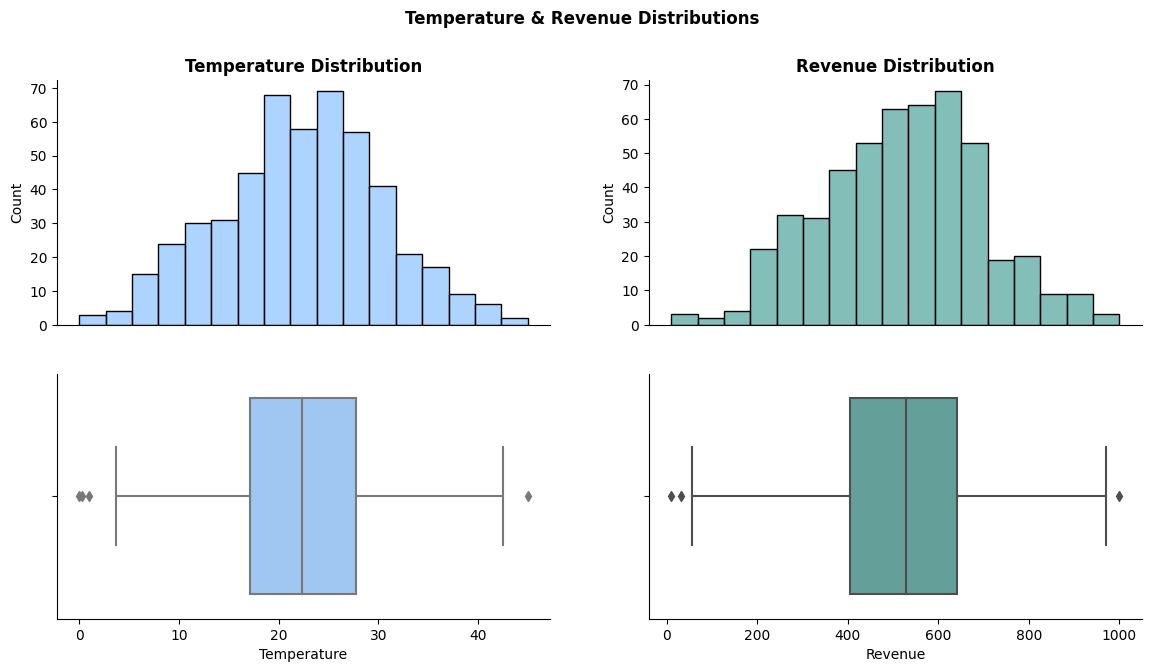

In [9]:
# plot styling
plt.style.use("seaborn-pastel")

# create figure object and axis
fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# distribution plots: temperature
sns.histplot(data=icecream, x="temperature", ax=ax1)
sns.boxplot(x=icecream["temperature"], ax=ax3)

# distribution plots: revenue
sns.histplot(data=icecream, x="revenue", color="#5AA9A2", ax=ax2)
sns.boxplot(x=icecream["revenue"], color="#5AA9A2", ax=ax4)

# remove spines
sns.despine()

# plot customization : temperature distribution
ax1.set_title("Temperature Distribution", fontweight="bold")
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_xticks([])
ax3.set_xlabel("Temperature")

# plot customization : revenue distribution
ax2.set_title("Revenue Distribution", fontweight="bold")
ax2.set_ylabel("Count")
ax2.set_xlabel("")
ax2.set_xticks([])
ax4.set_xlabel("Revenue")

# add figure title
fig.suptitle(f'Temperature & Revenue Distributions', fontweight="bold")

# show plot
plt.show()

💡 **Insight:**

The plot above indicates that both the `temperature` and `revenue` fields exhibit a normal distribution, as can be observed from their respective histograms. Additionally, the box plot shows that both variables have very few outliers, which can be identified as data points that lie beyond the whiskers of the box plot.

A normal distribution of the data implies that the majority of the observations are clustered around the mean, and the frequency of observations decrease as the distance from the mean increases. Furthermore, the presence of outliers suggests that there are a few observations that fall far from the typical values of the dataset, which could be due to measurement errors, data entry mistakes, or rare occurrences.

Overall, the normal distribution and few outliers in both temperature and revenue fields could provide useful insights for statistical analyses and modeling, as they indicate that the majority of the data is consistent and representative of the underlying phenomenon of interest. However, it is important to carefully examine and address any outliers, as they could skew the statistical results or affect the accuracy of the predictions.

### Data Relationships Analysis

In this section, we will examine the relationships between different columns in the dataset. This can include identifying correlation, co-occurrence, or mutual information. 

The goal of this analysis is to understand how the columns in the dataset are related to each other and to identify any potential issues that need to be addressed before further analysis. We can leverage visualization tools such as heatmaps, scatter plots and correlation matrix to achieve this.

Given that there are only two numerical fields, plotting a correlation matrix would not provide much insight. Instead, we will conduct the following analysis:

- **Correlation Analysis**: To examine the linear relationship between the two fields.
- **Bivariate Analysis**: To study the relationship between each pair of variables in the dataset and to identify any significant patterns or trends between them.

#### Correlation Analysis

In this section, we will be performing a correlation analysis to find the relationship between the numerical fields in the data. We have two numerical fields in our data, i.e., `temperature` and `revenue`.

The correlation coefficient will be represented as a value between $-1$ and $1$, where $-1$ indicates a strong negative correlation, $1$ indicates a strong positive correlation, and $0$ indicates no correlation.

In [10]:
corr_val = icecream["temperature"].corr(icecream["revenue"])
print(f"The pearson correlation coefficient between 'temperature' and 'revenue' is: {round(corr_val, 3):.2f}")

The pearson correlation coefficient between 'temperature' and 'revenue' is: 0.99


💡 **Insight:**

The Pearson correlation coefficient of $0.99$ between `revenue` and `temperature` indicates a very strong positive correlation. This implies that as the temperature increases, the revenue also increases, and vice versa.

However, it is important to note that correlation does not imply causation. Even though there is a strong relationship between `revenue` and `temperature`, it does not necessarily mean that changes in temperature directly cause changes in revenue. 

Other factors, such as marketing campaigns, competition, or consumer behavior, could also contribute to the observed correlation. Therefore, it is important to use caution and not assume causality based solely on the correlation coefficient.

#### Bivariate Analysis

In this section, we will be creating scatter plots to visualize the relationship between different features in the dataset.

By plotting the features against one another, we can gain insight into the correlation between them and identify any patterns or trends that may exist. This can help us understand the underlying structure of the data and inform our next steps in the data analysis process. Additionally, this can also help identify any potential outliers or anomalies in the data that may require further investigation.

We only have $2$ numerical features in our dataset and earlier we have found that there is a very strong linear relationship between the `temperature` and `revenue`. Let's visualize the bivariate distribution between the two:

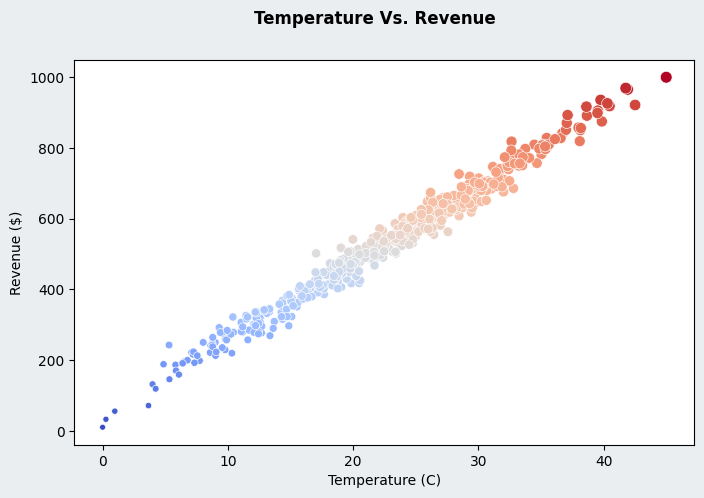

In [11]:
# create data for plot
x = icecream['temperature']
y = icecream['revenue']

# plot styling
plt.style.use("seaborn-pastel")

# create figure object and axis
fig = plt.figure(figsize=(8, 5), facecolor='#EAEEF1')
ax = fig.add_subplot()

# create plot
sns.scatterplot(x=x, y=y, size=round(y), hue=round(y), palette="coolwarm", ax=ax)

# hide legend
ax.legend().set_visible(False)

# plot customization
fig.suptitle("Temperature Vs. Revenue", fontweight="bold")
ax.set_xlabel("Temperature (C)")
ax.set_ylabel("Revenue ($)")

# view the plot
plt.show()

💡 **Insight:**

The plot exhibits a clear linear trend between the `temperature` and `revenue` variables, suggesting that changes in temperature are closely related to changes in revenue. This observation is consistent with the previously calculated Pearson correlation coefficient of $0.99$, which indicates a very strong positive linear correlation between the two variables.

The data profiling provided a comprehensive understanding of the data and their relationships. This analysis has revealed important insights into the distribution of the data and the correlations between the variables, which can guide the preprocessing and modeling stages of the data analysis pipeline.

By understanding the distribution of the data, we can choose appropriate preprocessing techniques, such as scaling or normalization, to prepare the data for modeling. Additionally, the insights gained from the analysis of the relationships between the variables can inform the feature engineering process too.

Now that we have a good understanding of the data and have identified the most relevant features and relationships, we can proceed to the preprocessing stage. The goal of preprocessing is to transform the data into a format suitable for machine learning models, while preserving the important information and minimizing the noise and redundancy. Once the data is preprocessed, we can begin to develop a linear model that captures the underlying patterns and can make accurate predictions or inferences.

## Data Preprocessing

This section will focus on preprocessing the data to create a linear regression machine learning model. Since the dataset has only one feature and one target, there is no need to perform any scaling, which is a common preprocessing technique that is used to standardize the range of feature values.

Instead, we can just split the data into feature set and target set, then, we can proceed to the train-test split on the feature and target sets. The train-test split is a crucial step in the machine learning pipeline as it helps us evaluate the performance of the model on new, unseen data. We will use $80\%$ of the data for training the model and $20\%$ for testing the model.

Once the data has been split, we can proceed to creating the machine learning model.

### Feature-Target Split

we will be splitting our dataset into feature and target datasets. The feature dataset will consist of the input variable(s) used to make predictions, while the target dataset will consist of the output variable that we are trying to predict. 

This separation is important as it allows us to clearly define the inputs and outputs of our model, and will facilitate the model training and evaluation process.

In [12]:
# feature set
X = icecream["temperature"].to_frame()

# view glimpse of feature set
X.head()

,temperature
0,29.70418
1,27.37540
2,23.98464
3,21.14405
4,26.59505


In [13]:
# target set
y = icecream["revenue"]

# view glimpse of target set
y.head()

0    659.87329
1    623.24870
2    559.13587
3    497.75232
4    627.90184
Name: revenue, dtype: float64

### Train-Test Split

Now, we will be splitting our dataset into a training set and a test set. This is a crucial step in evaluating the performance of our model, as we will be able to test the model's ability to generalize to new data.

The training set will be used to train the model, while the test set will be used to evaluate the model's performance. We will be using a $80$-$20$ split, where $80\%$ of the data will be used for training and $20\%$ for testing.

In [14]:
# import
from sklearn.model_selection import train_test_split

In [15]:
# splitting in 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# view the shape of training and test set
shape_dict = {
        "X_train": X_train.shape,
        "y_train": y_train.shape,
        "X_test": X_test.shape,
        "y_test": y_test.shape
    }

# prettify the dictionary output
tbl = dict_to_table(input_dict=shape_dict,
                    column_headers=["Dataframe", "Value"])

# show output
print(tbl)

+-----------+----------+
| Dataframe | Value    |
+-----------+----------+
| X_train   | (400, 1) |
| y_train   | (400,)   |
| X_test    | (100, 1) |
| y_test    | (100,)   |
+-----------+----------+


We can visualize the training and test datasets by the following scatterplot:

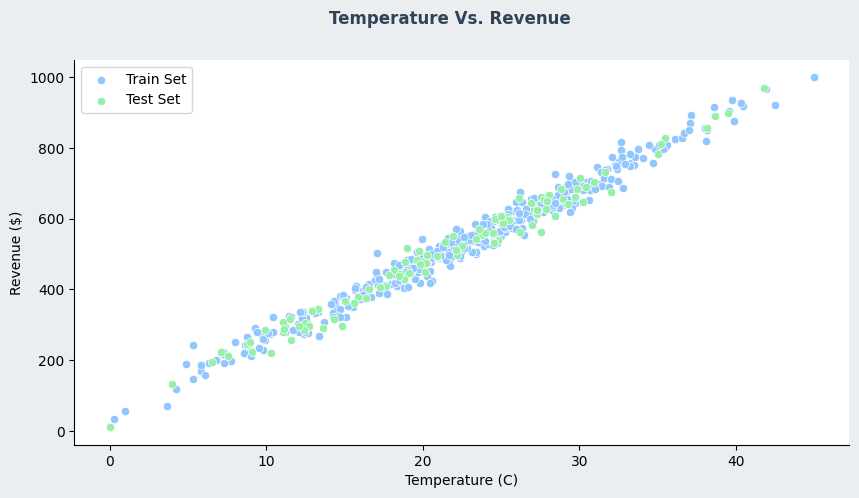

In [16]:
# plot styling
plt.style.use("seaborn-pastel")

# create figure object and axis
fig = plt.figure(figsize=(10, 5), facecolor='#EAEEF1')
ax = fig.add_subplot()

# create plot
sns.scatterplot(x=X_train.squeeze(), y=y_train, label="Train Set", ax=ax)
sns.scatterplot(x=X_test.squeeze(), y=y_test,label="Test Set", ax=ax)

# hide legend
ax.legend()

# remove top and right spines
sns.despine()

# plot customization
fig.suptitle("Temperature Vs. Revenue", fontweight="bold", color="#304255")
ax.set_xlabel("Temperature (C)")
ax.set_ylabel("Revenue ($)")

# view the plot
plt.show()

With the feature and target set data successfully split into training and testing, we can proceed to create the linear regression model and evaluate its performance.

## Model Training

In this section, we will use the linear regression machine learning model to train and evaluate our dataset. Specifically, we will employ the training set to train the linear regression algorithm, and assess its performance on the test set.

To evaluate the performance of the linear regression model, we will utilize a variety of regression evaluation metrics such as mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), coefficient of determination (R-squared), and others. These metrics will help us understand how well our model is performing and provide insights on areas where we can improve its performance.

In [17]:
# import linear model
from sklearn.linear_model import LinearRegression

In [18]:
# create model object
model = LinearRegression(fit_intercept=True)

# fit the model with training set
model.fit(X_train, y_train)

LinearRegression()

The slope and intercept of the linear model can be obtained using the `coef_` and `intercept_` methods, as follows:

In [19]:
# slope and intercept
model_slope = round(float(model.coef_), 2)
model_intercept = round(model.intercept_, 2)

# show results
print(f"Linear model slope (m): {model_slope}")
print(f"Linear model intercept (c): {model_intercept}")

Linear model slope (m): 21.41
Linear model intercept (c): 46.05


💡 **Insight:**

The slope and intercept of the linear model provides the following information:
- The slope value of indicates; for every unit increase in the independent variable (`temperature`), the dependent variable (`revenue`) increases by a constant value of $21.41$. 
- The intercept value of $46.05$ indicates the value of the dependent variable (`revenue`) when the independent variable is zero. 

These values can be used to predict the value of the dependent variable for any given value of the independent variable in a linear regression model.

## Model Evaluation

In this section, we will evaluate the performance of our linear regression model using various regression evaluation metrics and plots. The purpose of this evaluation is to assess the accuracy and reliability of our model in predicting outcomes for new, unseen data.

To do this, we will use our trained linear regression model to make predictions on a testing set of data that the model has not seen during training. We will then calculate various regression evaluation metrics such as the mean squared error (MSE), mean absolute error (MAE), and R-squared value. These metrics will help us understand how well our model is performing in terms of predicting outcomes and the amount of error in the predictions.

We will also create visualizations such as scatter plots, residual plots, and QQ plots to help us better understand the performance of our model and identify any patterns or trends in the data that the model may have missed. 

- The scatter plot will allow us to visually compare the predicted values against the actual values. 
- The residual plot will help us identify any systematic patterns in the residuals, which may indicate that our model is not capturing all of the information in the data. 
- The QQ plot will allow us to assess the normality assumption of our model's errors.

Based on the results of our evaluation, we may need to make adjustments to our model such as adding or removing features, changing the regularization parameter, or trying a different algorithm altogether. Ultimately, the goal of this section is to ensure that our model is accurate and reliable for making predictions on new, unseen data, and to identify any potential areas for improvement.

We can divide this process into the following sections:

- **Regression Metrics Analysis**: In this section, we will calculate various regression evaluation metrics to assess the accuracy and reliability of our linear regression model

- **Model Performance Visualization**: In this section, we will create visualizations such as scatter plots, residual plots, and QQ plots to help us visualize the performance of our linear regression model and identify any patterns or trends in the data that the model may have missed. These visualizations will allow us to assess the model's performance and identify potential areas for improvement.

### Regression Metrics Analysis

This section will evaluate the accuracy and reliability of a linear regression model in predicting outcomes for new, unseen data using different regression evaluation metrics. These metrics include the mean squared error (MSE), mean absolute error (MAE), R-squared value, etc.

By computing these regression evaluation metrics, we can assess the performance of the linear regression model and determine how well it generalizes to new, unseen data. This information is valuable in understanding the accuracy and reliability of the model, as well as identifying potential areas for improvement.

We have already created a helper function with the name `regression_metrics()` that calculates all the evaluation metrics for a regression problem for us and returns a dictionary with the values that we can analyze.

In [20]:
#predicted values
preds = model.predict(X_test)

# evaluation metrics
metrics_dict = regression_metrics(y_true=y_test, 
                   y_pred=preds, 
                   test_features=X_test)


# prettify the dictionary output
tbl = dict_to_table(input_dict=metrics_dict,
                    column_headers=["Metric", "Value"])

# show output
print(tbl)

+-------------------+--------+
| Metric            | Value  |
+-------------------+--------+
| MAE               | 19.89  |
| MSE               | 651.77 |
| RMSE              | 25.53  |
| MPE               | -4.36  |
| MAPE              | 8.0    |
| R2-Score          | 0.98   |
| Adjusted R2-Score | 0.98   |
+-------------------+--------+


💡 **Insight:**

We can draw the following conclusions from the achieved evaluation metrics:

The regression model appears to be performing well as indicated by the high R2-Score of $0.98$ and the Adjusted R2-Score of $0.98$. This suggests that $98\%$ of the variance in the dependent variable can be explained by the independent variables in the model. We have only one feature, therefore, the R2-score and adjusted R2-score are same.

Additionally, the MAE, MSE, and RMSE values provide information about the level of accuracy of the model's predictions, with lower values indicating better performance. 

The MPE and MAPE values provide information about the direction and magnitude of any errors in the model's predictions, with negative MPE indicating that the model tends to underestimate the target variable.

### Model Performance Visualization

In this section, we will create visualizations such as actual-predicted scatter plots, residual plots, and QQ plots to help us visualize the performance of our linear regression model and identify any patterns or trends in the data that the model may have missed. These visualizations will allow us to assess the model's performance and identify potential areas for improvement.

#### Actual-Predicted Scatter Plot

Visualizing the relationship between the predicted and actual values using actual-predicted scatter plots can be a valuable tool for evaluating the performance of a regression model. These plots provide a clear visual representation of how well the model is predicting the target variable and can help identify any nonlinear patterns or outliers in the data that the model may have missed.

In this section, we will create actual-predicted scatter plots for both the test and training data sets. By comparing the scatter plots for the two data sets, we can evaluate how well the model is able to generalize the information it learned during the training phase to new, unseen data.

If the actual-predicted scatter plot for the test data is similar to that of the training data, this indicates that the model is generalizing well to new data and that it is able to make accurate predictions. However, if there is a significant difference between the two plots, this may indicate that the model is overfitting the training data and not generalizing well to new data.

By visualizing the actual-predicted relationship in the data, we can gain valuable insights into the performance of the regression model and make informed decisions about any necessary improvements.

Now, let's visualize the actual-predicted scatter plot for our linear regression model:

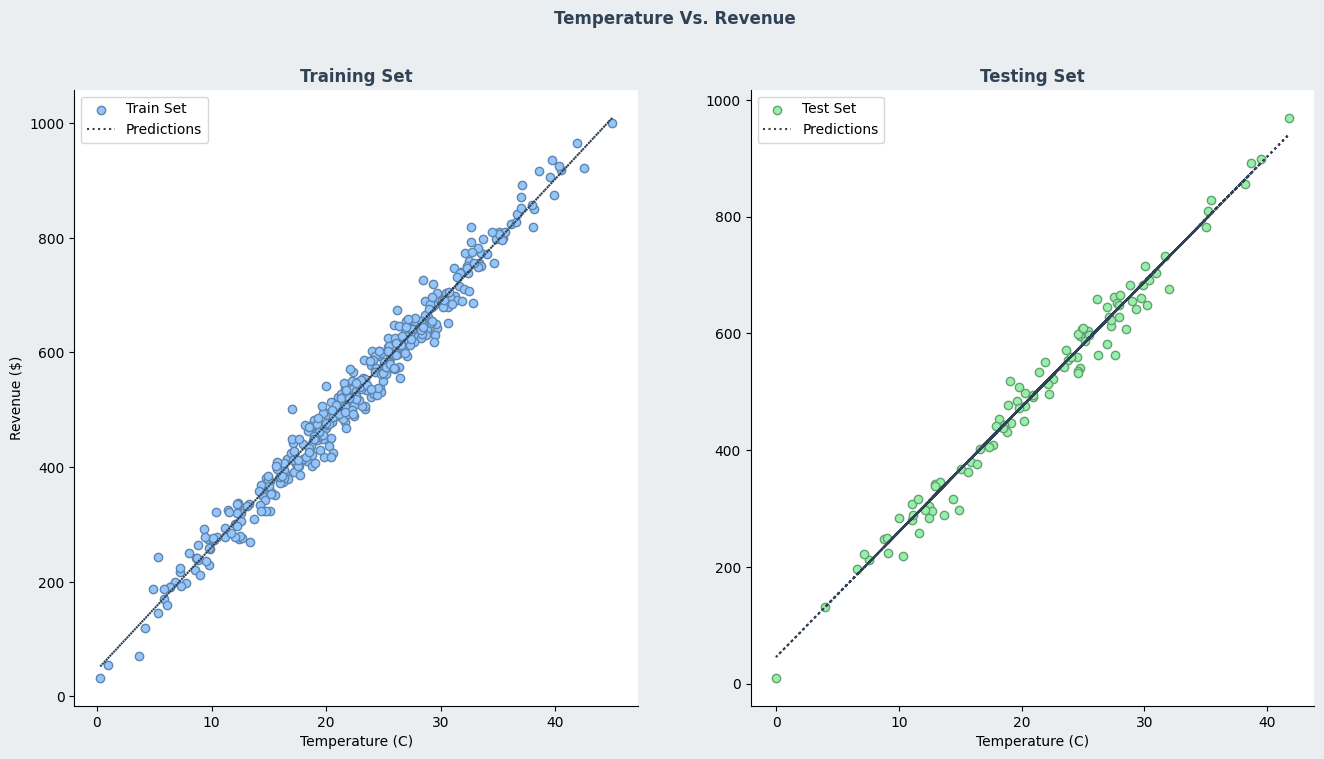

In [21]:
# plot styling
plt.style.use("seaborn-pastel")

# create figure object and axis
fig = plt.figure(figsize=(16, 8), facecolor='#EAEEF1')
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# create plot (training set)
ax1.scatter(x=X_train.squeeze(), y=y_train, edgecolor="#6184AA", label="Train Set")
ax1.plot(X_train.squeeze(), model.predict(X_train), c="#304255", ls=":", label="Predictions")

# create plot (test set)
ax2.scatter(x=X_test.squeeze(), y=y_test, c="#97F0AA", edgecolor="#64A071", label="Test Set")
ax2.plot(X_test.squeeze(), model.predict(X_test), c="#304255", ls=":", label="Predictions")

# show legends
ax1.legend()
ax2.legend()

# remove top and right spines
sns.despine()

# figure title
fig.suptitle("Temperature Vs. Revenue", fontweight="bold", color="#304255")

# training set plot customization
ax1.set_title("Training Set", fontweight="bold", color="#304255")
ax1.set_xlabel("Temperature (C)")
ax1.set_ylabel("Revenue ($)")

# test set plot customization
ax2.set_title("Testing Set", fontweight="bold", color="#304255")
ax2.set_xlabel("Temperature (C)")
ax2.set_ylabel("")

# view the plot
plt.show()

💡 **Insight:**

By comparing the actual-predicted scatter plots for both the training and test data sets, we can observe the model's ability to generalize and make accurate predictions for new, unseen data. In this case, we can observe that the predicted values of the model show a high degree of similarity between the two scatter plots.

This similarity indicates that the model is generalizing well to new data and that it is making accurate predictions for both the training and test sets. This is an important feature of a well-performing regression model, as it indicates that the model has not overfit to the training data and that it can be applied to new data with confidence.

#### Residual Plot

Residual plots show the difference between the predicted values and the actual values, and can help us to identify any systematic errors in the model's predictions.

By plotting the residuals against the predicted values, we can visually inspect the distribution of the residuals and check whether they are randomly scattered around zero, with no clear pattern or trend. This indicates that the model is accurately capturing the underlying patterns in the data and is making unbiased predictions. A constant spread of residuals across the range of predicted values is also an indication of an ideal liner regression model.

If the residuals show a clear pattern, such as a curved or U-shaped relationship, it suggests that the model is not capturing some of the underlying patterns in the data, and further investigation is needed.

The residual plot can also be used to detect outliers or unusual observations that may be affecting the model's performance. Outliers are data points that are significantly different from the other observations, and they can have a large impact on the regression coefficients and predictions. By inspecting the residual plot, we can identify any outliers or unusual observations that may need to be removed from the dataset.

By examining the residual plot, we can gain a deeper understanding of the strengths and weaknesses of the model and make necessary improvements.

Now, let's visualize the residual plot for our linear regression model:

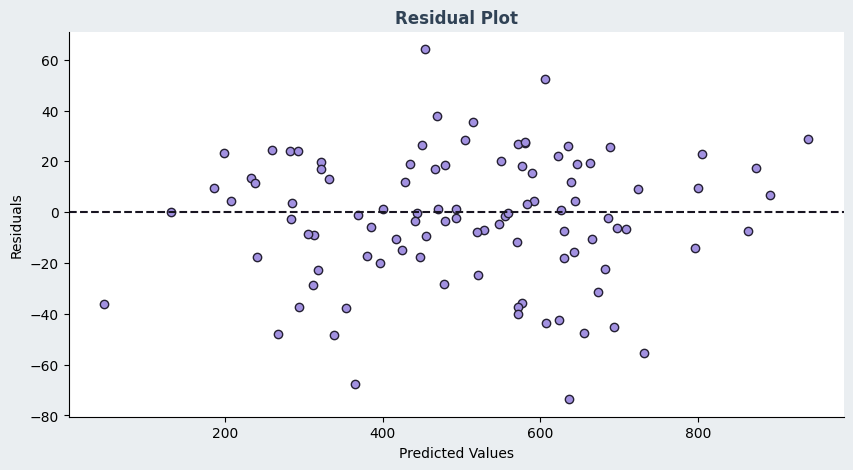

In [22]:
# prepare data
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# plot styling
plt.style.use("seaborn-pastel")

# create figure object and axis
fig = plt.figure(figsize=(10, 5), facecolor='#EAEEF1')
ax = fig.add_subplot()

# create residual plot
ax.scatter(y_pred, residuals, color="#A291E1", edgecolor="#242032")
ax.axhline(y=0, color='#181521', linestyle='--')

# remove top and right spines
sns.despine()

# plot customization
ax.set_title("Residual Plot", fontweight="bold", color="#304255")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Residuals")

# view the plot
plt.show()

💡 **Insight:**

Upon observing the residual plot, it can be noted that the residuals are uniformly distributed across the range of predicted values and are randomly scattered around the zero line. This suggests that the regression model is making accurate and unbiased predictions, as there is no clear pattern or trend in the distribution of residuals.

A uniform spread of residuals across the range of predicted values indicates that the variance of the residuals is constant, which is one of the assumptions of linear regression. A random scatter of residuals around zero further suggests that the model is capturing the underlying patterns in the data and making unbiased predictions.

#### QQ Plot

A QQ plot (short for quantile-quantile plot) is a type of visualization that helps you evaluate whether the residuals of a linear regression model are normally distributed. In a QQ plot, the standardized residuals (i.e., the residuals divided by their standard deviation) are plotted against the expected values of a normal distribution.

An ideal QQ plot should display the standardized residuals scattered approximately along a straight diagonal line. If the standardized residuals follow this diagonal line, it indicates that the residuals are approximately normally distributed, which is one of the key assumptions of linear regression.

If the points on the QQ plot deviate from the diagonal line, it suggests that the residuals are not normally distributed. If the points on the plot curve upwards or downwards, it suggests that the residuals have a skewness and are not symmetrically distributed around zero. On the other hand, if the points on the plot are spread out or compressed in certain regions, it suggests that the residuals have a kurtosis and are not distributed with the same variance.

Let's visualize the QQ plot for our linear regression model:

In [23]:
from scipy.stats import probplot

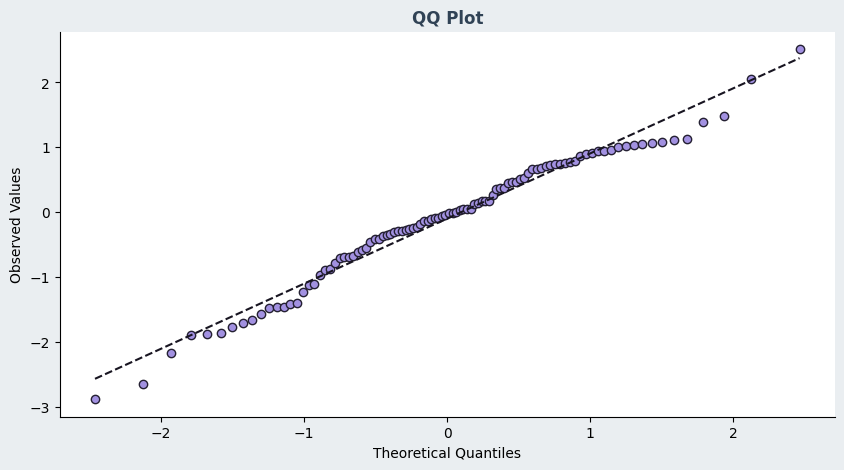

In [24]:
# make predictions on testing set
y_pred = model.predict(X_test)

# calculate residuals
residuals = y_test - y_pred

# calculate standardized residuals
std_residuals = residuals / residuals.std()

# plot styling
plt.style.use("seaborn-pastel")

# create figure object and axis
fig = plt.figure(figsize=(10, 5), facecolor='#EAEEF1')
ax = fig.add_subplot()

# create QQ plot
probplot(std_residuals, plot=ax)

# customize markers
ax.get_lines()[0].set_markerfacecolor("#A291E1")
ax.get_lines()[0].set_markeredgecolor("#242032")

# csutomize line
ax.get_lines()[1].set_color("#181521")
ax.get_lines()[1].set_linestyle("--")

# remove top and right spines
sns.despine()

# adds title to plot
ax.set_title("QQ Plot", fontweight="bold", color="#304255")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Observed Values")

# view the plot
plt.show()

💡 **Insight:**


Upon examining the QQ plot, we can observe that the standardized residuals are distributed along a straight diagonal line, which indicates that the residuals of the linear regression model are approximately normally distributed. This is a desirable outcome, as normally distributed residuals are one of the key assumptions of linear regression.

## Model Predictions

In this section, we will apply the linear regression model that has been previously trained using the ice-cream dataset to forecast the average revenue outcomes on a new set of data. To achieve this, we will use the `predict()` method to generate predictions.

Specifically, we will select a random set of temperature data from our dataset and examine how well our model can predict the corresponding revenue figures. Additionally, we will create two new fields in our analysis:

- `error`: Calculate the difference between the actual and predicted values
- `error_pct`: Calculates absolute percentage difference from the actual value. 

This will provide us with a clear understanding of how well our model is performing in terms of accuracy and precision.

In [25]:
# create a sample set
sample_set = icecream.sample(10)

# get temperatures (independent variable)
sample_temps = sample_set["temperature"].to_frame()

# calculate predicted revenue and add it as a column
sample_set["predicted_revenue"] = model.predict(sample_temps)

# calculates errors and percentage errors
sample_set["error"] = sample_set["revenue"] - sample_set["predicted_revenue"]
sample_set["error_pct"] = np.abs(sample_set["error"])/sample_set["revenue"]

# view results
(
    sample_set.reset_index(drop=True)
    .style.background_gradient(cmap="coolwarm", subset=["error_pct"], vmin=0, vmax=1)
    .format("{:.2f}")
    .format("{:.2%}", subset=["error_pct"])
)

,temperature,revenue,predicted_revenue,error,error_pct
0,21.78,534.62,512.30,22.33,4.18%
1,28.73,631.32,661.19,-29.87,4.73%
2,14.11,358.00,348.15,9.85,2.75%
3,25.45,625.85,590.92,34.92,5.58%
4,22.84,516.55,535.12,-18.57,3.60%
5,11.08,280.52,283.24,-2.72,0.97%
6,12.12,297.03,305.61,-8.59,2.89%
7,15.92,381.04,386.84,-5.80,1.52%
8,21.70,496.01,510.60,-14.59,2.94%
9,14.55,323.94,357.61,-33.66,10.39%


💡 **Insight:**

We can see that the model is performing very well in predicting the average revenue when temperature is given. The disparity between the actual and predicted revenue values is relatively small, as indicated by the low values of Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE), which were calculated as $19.89$ and $25.53$, respectively. Furthermore, the high R-squared value of $0.98$ indicates that the model explains the variation in the dependent variable to a great extent.

These evaluation metrics confirm that the model is highly accurate and reliable in predicting the revenue figures based on temperature inputs, which can be extremely useful for making informed business decisions.

## Model Export

In this section, we will be exporting the linear regression model into a pickle file for deployment. This will allow us to use the model in other environments, such as a production setting, to make predictions.

We will use the `pickle` module in Python to export the model. By using the `dump()` function of pickle, we can write the model to a file.

In [26]:
with open('../03_MODELS/icecream_linear_model.pkl', 'wb') as pf:
    pickle.dump(model, pf)

## Conclusion

This notebook takes us through the complete machine learning workflow for analyzing the given ice-cream dataset. 

In the "data profiling" section, we have explored the dataset and identified patterns and relationships between the temperature and average revenue fields. Moving on to the "data preprocessing" section, we have prepared the data by splitting it into training and test sets, and trained a linear regression model to predict the average revenue generated based on the temperature.

In the "model evaluation" section, we have evaluated the performance of the trained model using metrics such as R2-score, mean squared error (MSE), mean absolute error (MAE), and root mean squared error (RMSE), as well as data visualization techniques such as actual-predicted scatter plots, residual plots, and QQ plots. We have also performed predictions on a random set of data using the trained model and computed the error metrics for the predictions.Finally, we have exported the trained model into a pickle file, 

The next step is to deploy the model as a web app using Flask. This will make the model available to users through a simple and intuitive web interface, allowing anyone to generate revenue predictions based on the temperature input.

---